In [1]:
### Import libraries 
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning & evaluation
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score, homogeneity_score 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df=pd.read_csv(r"C:\Users\shopinverse\Documents\Python Datasets\Customers-Selore-2.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check the shape of the dataset
df.shape

(200, 5)

In [4]:
# Check the dataset entire information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Check the statistical information of the dataset
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


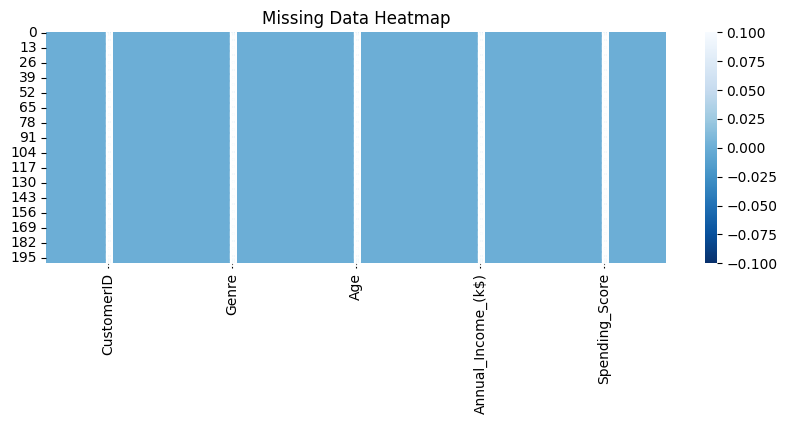

In [73]:
# Check for missing data
print(df.isnull().sum())

# Visualize the missing data using heatmap chart.
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), annot=True, cmap='Blues_r')
plt.title('Missing Data Heatmap');

### Data Cleaning & Preprocessing 

In [6]:
# Check for duplicate data
print(df.duplicated().sum())

0


There are no duplicate data in the dataset

### Exploratory Data Analysis 


### Univariate Analysis

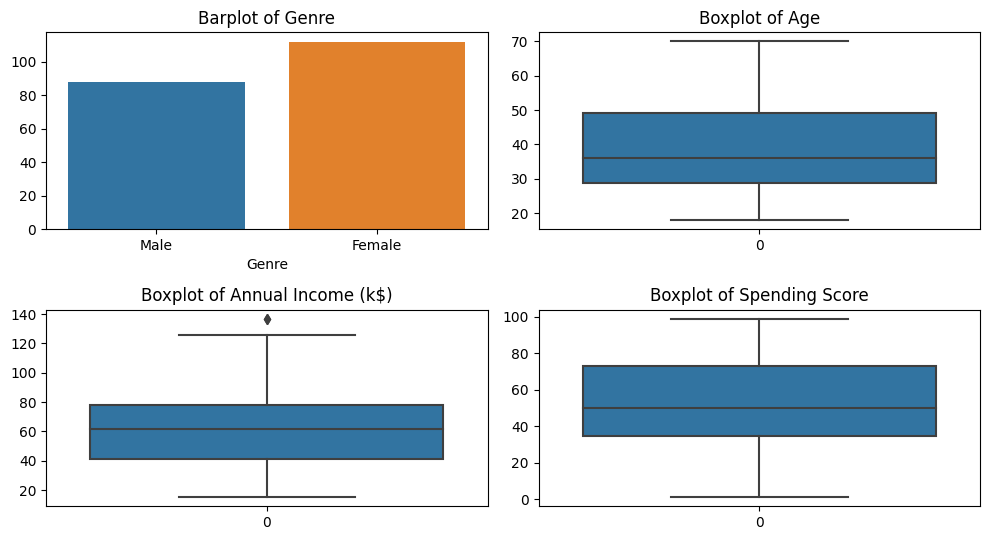

In [7]:
# Plot visuals to reveal outliers 

fig, axs=plt.subplots(2,2, figsize=(10,5.5))

plt1 = sns.barplot(x=df['Genre'], y=df.index, ax=axs[0,0], estimator=len)
plt1.set_title('Barplot of Genre')

plt2 = sns.boxplot(df['Age'], ax=axs[0,1])
plt2.set_title('Boxplot of Age')

plt3 = sns.boxplot(df['Annual_Income_(k$)'], ax=axs[1,0])
plt3.set_title('Boxplot of Annual Income (k$)')

plt4 = sns.boxplot(df['Spending_Score'], ax=axs[1,1])
plt4.set_title('Boxplot of Spending Score')

plt.tight_layout()

There's one identified outlier in the Annual Income feature. However, this is insignificant. 

### Bivariate Analysis

In [8]:
# Function to Group the Age feature
def age_group(x):
    if x <= 20:
        return 'Teenager (<=20)'
    elif x <= 30:
        return 'Young Adult (<=30)'
    elif x <= 40:
        return 'Adult (<=40)'
    elif x == 50:
        return 'Old Adult (<=50)'
    else:
        return 'Senior (>50)'

df['Age_Group'] = df['Age'].apply(age_group)

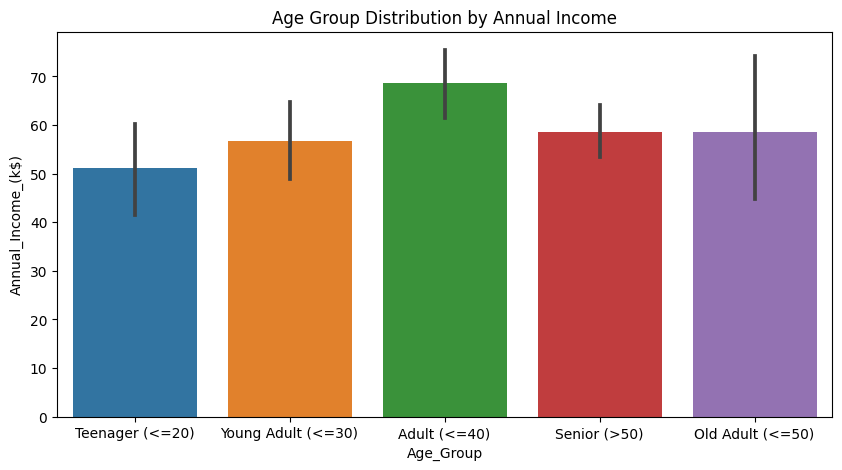

In [90]:
# Investigating the relationship between Age Group and Annual Income. 
plt.figure(figsize=(10,5))
sns.barplot(x='Age_Group', data=df, y='Annual_Income_(k$)')
plt.title('Age Group Distribution by Annual Income')
plt.show();

The Adult age group earn the highest income per annum while Teenager age group earn the least. 

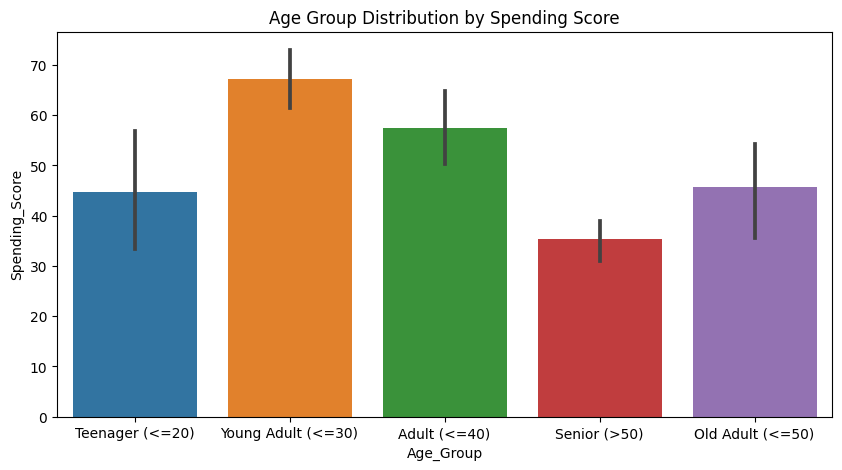

In [11]:
# Investigating the relationship between Age Group and Spending Score 
plt.figure(figsize=(10,5))
sns.barplot(x='Age_Group', data=df, y='Spending_Score')
plt.title('Age Group Distribution by Spending Score')
plt.show();

In terms of spending habits, the Young Adult age group spend the most while the Senior age group spend the least. 

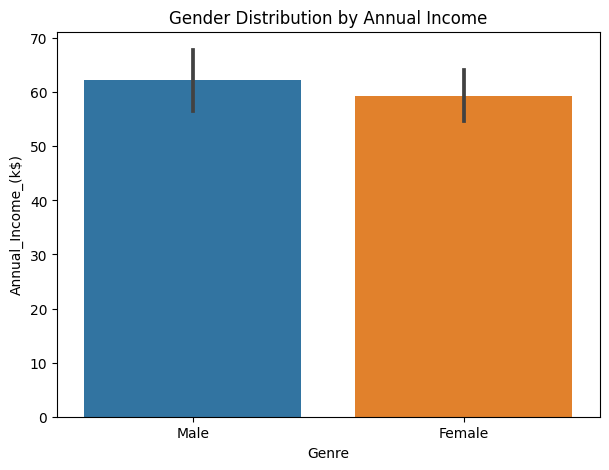

In [14]:
# Investigating the relationship between Genre and Annual Income
plt.figure(figsize=(7,5))
sns.barplot(x='Genre', data=df, y='Annual_Income_(k$)')
plt.title('Gender Distribution by Annual Income')
plt.show();

The viz above shows men earn more than women in the dataset.

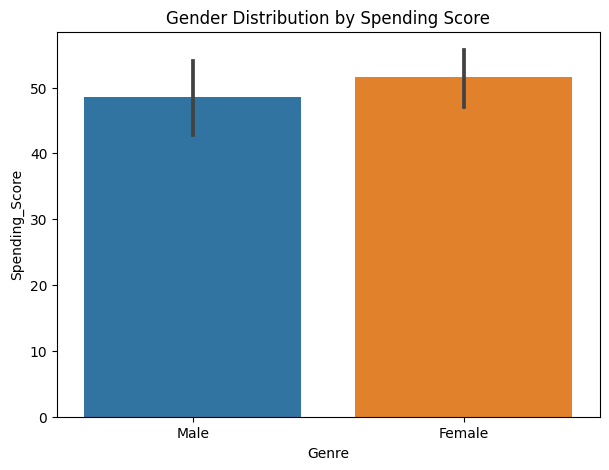

In [15]:
# Investigating the relationship between Genre and Spending Score 
plt.figure(figsize=(7,5))
sns.barplot(x='Genre', data=df, y='Spending_Score')
plt.title('Gender Distribution by Spending Score')
plt.show();

In terms of spending habits between both gender, women spend more than men.

### Multivariate Analysis

                    CustomerID     Genre       Age  Annual_Income_(k$)  \
CustomerID            1.000000  0.057400 -0.026763            0.977548   
Genre                 0.057400  1.000000  0.060867            0.056410   
Age                  -0.026763  0.060867  1.000000           -0.012398   
Annual_Income_(k$)    0.977548  0.056410 -0.012398            1.000000   
Spending_Score        0.013835 -0.058109 -0.327227            0.009903   
Age_Group            -0.186119  0.006245 -0.265205           -0.188023   

                    Spending_Score  Age_Group  
CustomerID                0.013835  -0.186119  
Genre                    -0.058109   0.006245  
Age                      -0.327227  -0.265205  
Annual_Income_(k$)        0.009903  -0.188023  
Spending_Score            1.000000   0.076341  
Age_Group                 0.076341   1.000000  


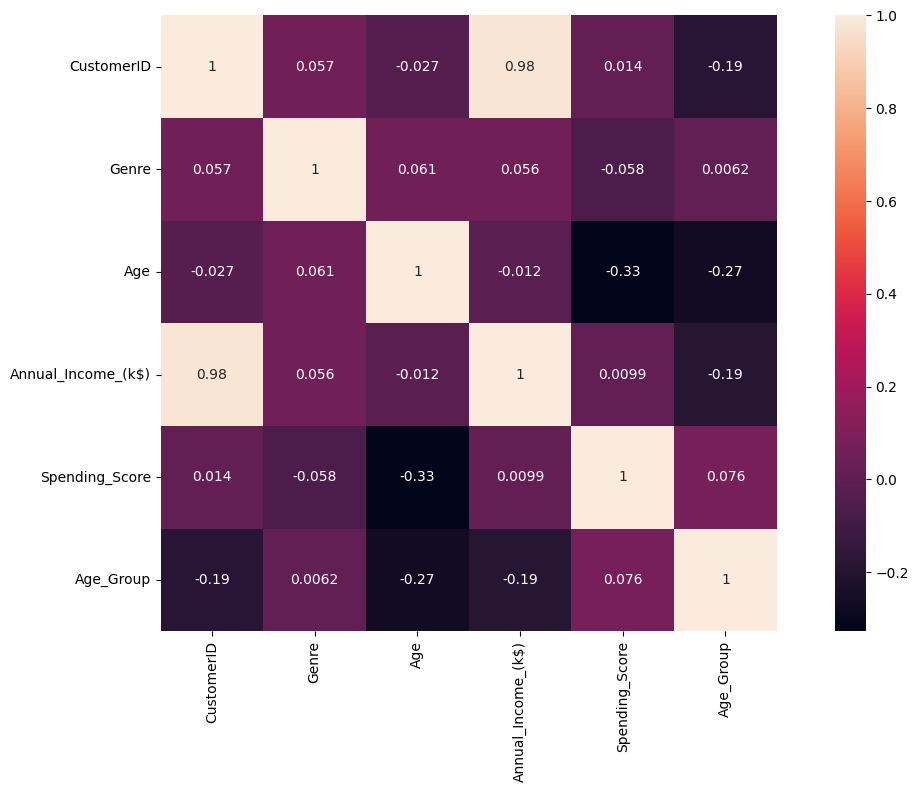

In [24]:
# Plotting a Correlation matrix for all numerical features. 
numeric_df=df.select_dtypes(include='number')
a=numeric_df.corr()
print (a) 

# Visualizing the correleation matrix using a heatmap. 
ax=plt.subplots(figsize=(15,8))
sns.heatmap(a,square=True, annot=True);

There's a very strong negative relationship between age and spending_score, both a not linearly related. Likewise, there's a weak negative relationship between Age and annual income while there's a weak positive relationship betwwen annual income and spending score as both are linearly related.

### Model Building 

In [25]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Age_Group
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [22]:
# Function to convert all features in the dataset to numerical values. 
from sklearn.preprocessing import LabelEncoder

# Label Encoding 
# Method initialization
encoder=LabelEncoder()

# Looping for columns except survived 
for c in df.columns [1:]:
    if (df[c].dtype=='object'):
        df[c]=encoder.fit_transform(df[c])
    else:
        df[c]=df[c]

In [31]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Age_Group
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,0


In [32]:
# Remove or drop-off irrelevant features - Age Group
df.drop('Age_Group', axis=1, inplace=True)

In [ ]:
# Remove or drop-off irrelevant features - Customer ID
df.drop('Age_Group', axis=1, inplace=True)

In [33]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


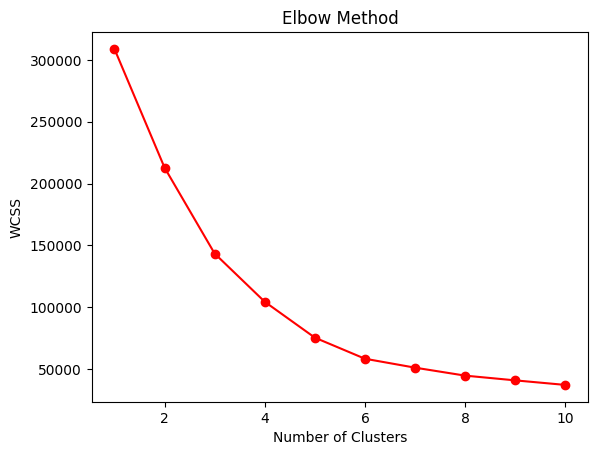

In [34]:
# Determine the optimal number of clusters to use prior to building the ML model

wcss=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show();

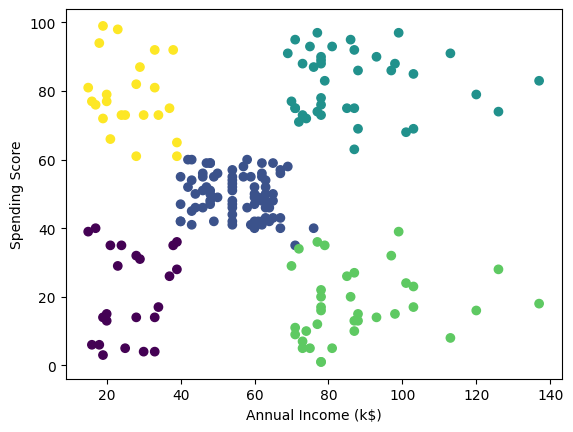


silhouette_score is 0.44473703994455477


In [35]:
# Fit k-means Clustering Model 
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df)

# Add Cluster Labels to data 
df['cluster']=kmeans.labels_

# Visualize Cluster Result
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=df['cluster'], label='centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()
print()

# Calculate Evaluation metrics for the k-means clustering Model - Silhouette Score 
from sklearn.metrics import silhouette_score 
print(f"silhouette_score is", silhouette_score(df, kmeans.labels_))


### Conclusion

In conclusion, I have been able to use the k-means clustering Machine learning Model to analyze the dataset. Below are my finds:

My Machine Learning model was able to create 5 clusters from the dataset which are: (1) Low income earners who have low spending habits, (2) Low income earners who have very high spending habits.

(3) Mid-income earners who have mid spending habbits (i.e whose spending habits are not too low and not too high), (4) High income earners with low spending habits and lastly (5) High income earners who have very high spending habits. 

Lasttly, the model evaluation metric returned an accuracy of 44%.